In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Ejercicio 2

Elaborar una función en Python que permita comparar dos muestras (puede ser dos muestras provenientes de distribuciones
teóricas, una teórica y una a partir de datos, o dos muestras provenientes a partir de datos). La función debe mostrar:

1. Las funciones de densidad f1 y f2.
2. Las funciones de distribución F1 y F2.
3. Una gráfica PP (prob-prob).
4. Una gráfica QQ (quantil-quantil).

Además, debe calcular la distancia de Kolmogorov-Smirnov (KS), e ilustrar en las gr´aficas de densidad y de distribuci´on, el
punto donde se alcanza esta distancia KS. Realizar una prueba de hip´otesis de Kolmogorov-Smirnov para comparar dichas
muestras.

Usar alguno de los experimentos del ejercicio anterior (con un valor p y N fijo), y comparar la distribuci´on obtenida del
experimento, contra una muestra generada aleatoriamente de la distribuci´on geom´etrica

In [34]:
def compare_muestras(muestra1, muestra2, label1='Muestra 1', label2='Muestra 2'):
    #Funciones de densidad
    kde1 = stats.gaussian_kde(muestra1)
    kde2 = stats.gaussian_kde(muestra2)

    x = np.linspace(min(muestra1.min(), muestra2.min()), max(muestra1.max(), muestra2.max()), 1000)

    #Funciones de distribución
    cdf1 = np.array([np.mean(muestra1 <= xi) for xi in x])
    cdf2 = np.array([np.mean(muestra2 <= xi) for xi in x])

    #Distancia Kolmogorov-Smirnov
    ks_stat, p_value = stats.ks_2samp(muestra1, muestra2)

    #Gráfica de densidad
    plt.figure(figsize=(10, 6))
    plt.plot(x, kde1(x), label='Densidad de muestra 1', color='blue')
    plt.plot(x, kde2(x), label='Densidad de muestra 2', color='red')
    plt.title('Funciones de Densidad')
    plt.legend()
    plt.axvline(x[np.argmax(np.abs(cdf1 - cdf2))], linestyle='--', color='black', label='KS Distance')
    plt.show()
    
    #Gráfica de distribución acumulada
    plt.figure(figsize=(10,6))
    plt.plot(x, cdf1, label='CDF de muestra 1', color='blue')
    plt.plot(x, cdf2, label='CDF de muestra 2', color='red')
    plt.title('Funciones de Distribución Acumulada')
    plt.legend()
    plt.axvline(x[np.argmax(np.abs(cdf1 - cdf2))], linestyle='--', color='black', label='KS Distance')
    plt.show()

    #PP Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(np.sort(cdf1), np.sort(cdf2))
    plt.plot([0, 1], [0, 1], linestyle='--', color='black')
    plt.title('Gráfica PP')
    plt.xlabel('Cuantiles de muestra 1')
    plt.ylabel('Cuantiles de muestra 2')
    plt.show()
    
    #QQ Plot
    quantiles1 = np.quantile(muestra1, np.linspace(0, 1, len(muestra1)))
    quantiles2 = np.quantile(muestra2, np.linspace(0, 1, len(muestra2)))
    plt.figure(figsize=(6, 6))
    plt.scatter(quantiles1, quantiles2)
    plt.plot([min(quantiles1.min(), quantiles2.min()), max(quantiles1.max(), quantiles2.max())],
            [min(quantiles1.min(), quantiles2.min()), max(quantiles1.max(), quantiles2.max())],
            linestyle='--', color='black')
    plt.title('Gráfica QQ')
    plt.xlabel('Cuantiles de muestra 1')
    plt.ylabel('Cuantiles de muestra 2')
    plt.show()

    print(f'Estadístico KS: {ks_stat}, p-valor: {p_value}')
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: Las muestras provienen de distribuciones diferentes.")    
    else:
        print("No se puede rechazar la hipótesis nula: Las muestras pueden provenir de la misma distribución.")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [35]:
def simulación_moneda(p, N=1000):
    """
    Simula N experimentos donde se cuenta el número de lanzamientos hasta el primer éxito,
    siguiendo una distribución geométrica con parámetro p.
    """
    samples = np.random.geometric(p, size=N)
    return samples

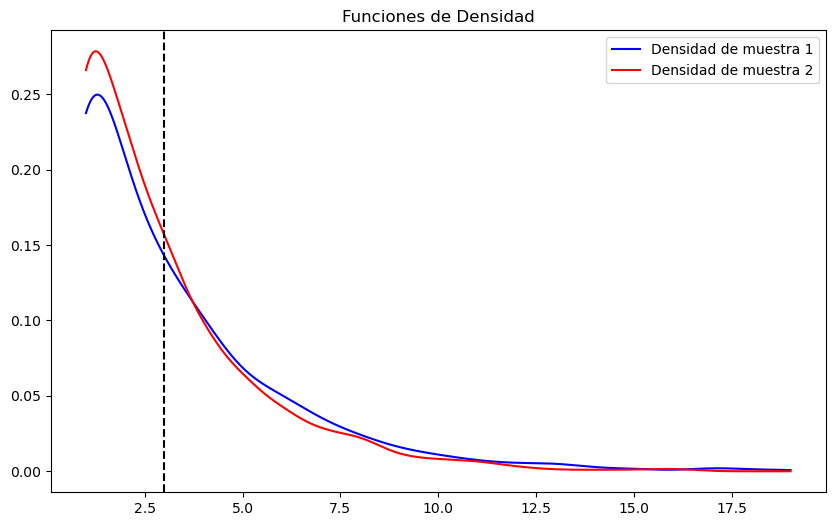

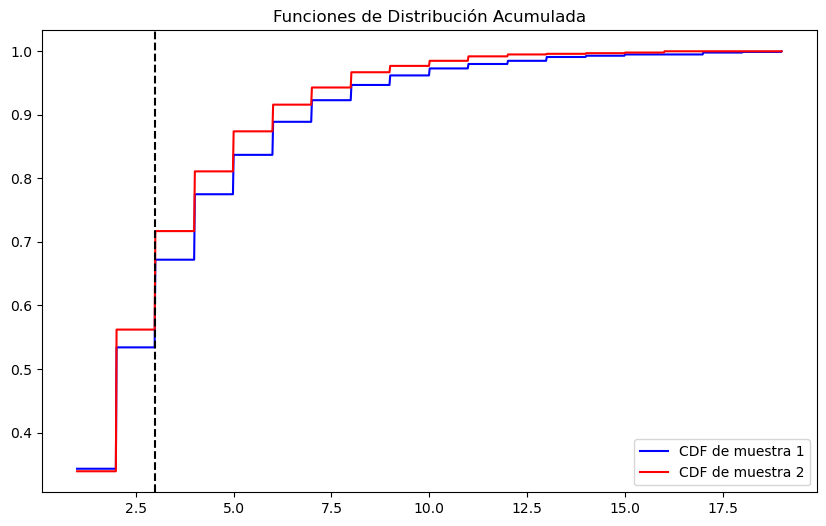

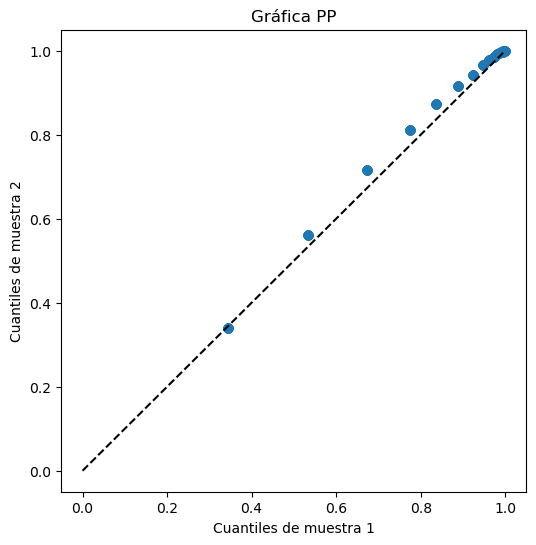

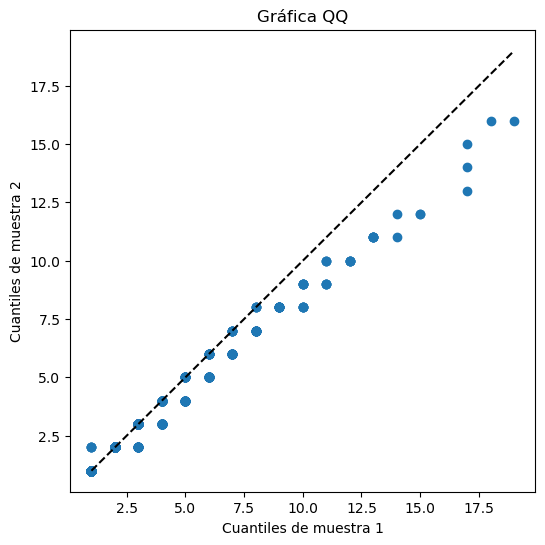

Estadístico KS: 0.045, p-valor: 0.26347172719864703
No se puede rechazar la hipótesis nula: Las muestras pueden provenir de la misma distribución.


In [36]:
p = 0.3
N = 1000

dist1 = simulación_moneda(p, N)
dist2 = simulación_moneda(0.35, N)
compare_muestras(dist1, dist2)

# Ejercicio 3

La ley de Benford, (o ley de Newcomb-Benford, también conocida como la ley del primer dígito), asegura que, en gran
variedad de conjuntos de datos numéricos que existen en la vida real, la primera cifra es 1 con mucha más frecuencia que el
resto de los números. Además, según crece este primer dígito, menos probable es que se encuentre en la primera posición.
Esta ley empírica establece que la probabilidad que el dígito d (1 ≤ d ≤ 9). 

El archivo areas.csv contiene información de las áreas de todos los países.

Aplicar las comparaciones del Ejercicio 4, así como la prueba estad´ıstica de Kolmogorov-Smirnov para determinar si los datos
del primer dígito no-nulo en el conjunto de áreas se comporta de acuerdo a la ley de Benford o no. Explique sus conclusiones

In [37]:
def extract_digit(data):
    first_digits = [int(str(abs(num))[0]) for num in data if num != 0]
    return first_digits

def benford_distribution():
    return np.array([np.log10(1+1/d) for d in range(1, 10)])

def compare_with_benford(data):
    """Compara los datos con la distribución de Benford mediante la prueba KS."""
    first_digits = extract_digit(data)
    unique, counts = np.unique(first_digits, return_counts=True)

    # Normalización para obtener la distribución empírica
    pmf_empirical = np.zeros(9)  # De 1 a 9
    pmf_empirical[unique - 1] = counts / len(first_digits)  # Ajuste de índices
    pmf_theoretical = benford_distribution()

    # Kolmogorov-Smirnov test
    ks_stat, p_value = stats.ks_2samp(pmf_empirical, pmf_theoretical)

    # Gráfica de barras de la distribución empírica vs Benford
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, 10), pmf_empirical, alpha=0.7, label="Empírica", color="red")
    plt.plot(range(1, 10), pmf_theoretical, marker="o", linestyle="--", color="blue", label="Benford")
    plt.xticks(range(1, 10))
    plt.xlabel("Primer Dígito")
    plt.ylabel("Probabilidad")
    plt.title("Distribución del Primer Dígito vs Benford")
    plt.legend()
    plt.show()

    # CDFs acumuladas
    cdf_empirical = np.cumsum(pmf_empirical)
    cdf_theoretical = np.cumsum(pmf_theoretical)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 10), cdf_empirical, label="CDF Empírica", color="red")
    plt.plot(range(1, 10), cdf_theoretical, label="CDF Benford", linestyle="--", color="blue")
    plt.xlabel("Primer Dígito")
    plt.ylabel("Probabilidad Acumulada")
    plt.title("Función de Distribución Acumulada (CDF)")
    plt.legend()
    plt.show()

    # PP Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(cdf_theoretical, cdf_empirical, color="blue")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")  # Línea de referencia
    plt.title("PP Plot")
    plt.xlabel("Cuantiles Teóricos")
    plt.ylabel("Cuantiles Empíricos")
    plt.show()

    # QQ Plot
    quantiles_empirical = np.quantile(first_digits, np.linspace(0, 1, len(first_digits)))
    quantiles_theoretical = np.quantile(np.arange(1, 10), np.linspace(0, 1, len(first_digits)))

    plt.figure(figsize=(6, 6))
    plt.scatter(quantiles_theoretical, quantiles_empirical, color="blue")
    plt.plot([min(quantiles_theoretical), max(quantiles_theoretical)], 
             [min(quantiles_theoretical), max(quantiles_theoretical)], 
             linestyle="--", color="black")
    plt.title("QQ Plot")
    plt.xlabel("Cuantiles Teóricos")
    plt.ylabel("Cuantiles Empíricos")
    plt.show()

    # Resultado del test KS
    print(f"Estadístico KS: {ks_stat:.4f}, p-valor: {p_value:.4f}")
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: Los datos NO siguen la distribución de Benford.")
    else:
        print("No se puede rechazar la hipótesis nula: Los datos pueden seguir la distribución de Benford.")


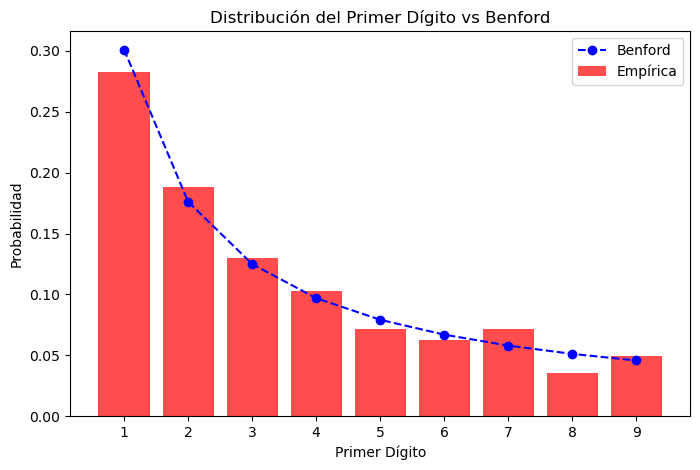

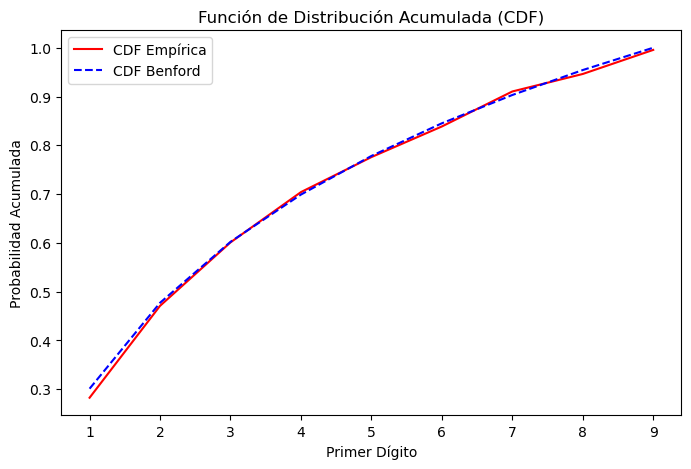

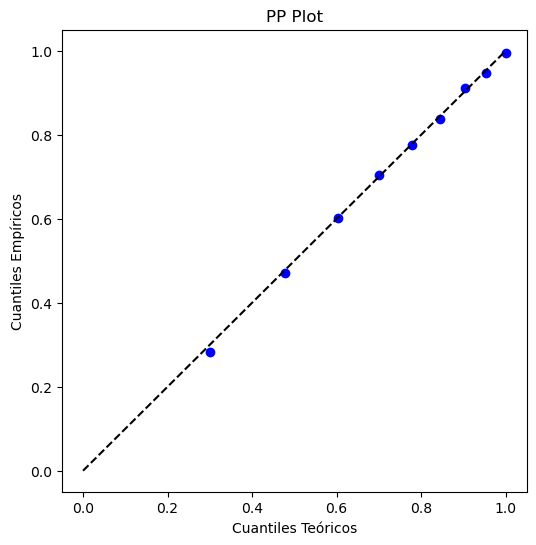

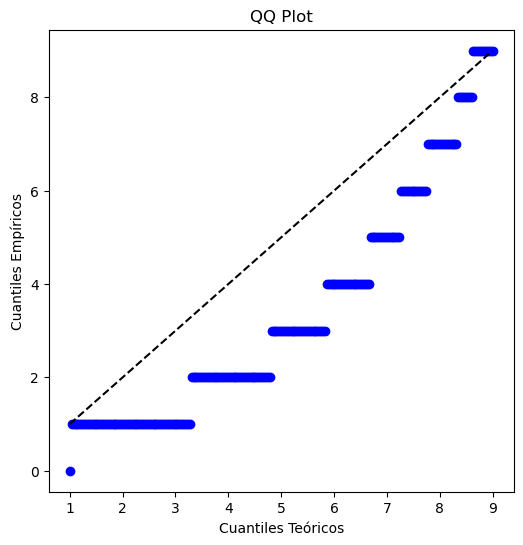

Estadístico KS: 0.1111, p-valor: 1.0000
No se puede rechazar la hipótesis nula: Los datos pueden seguir la distribución de Benford.


In [38]:
df = pd.read_csv('areas.csv', sep=';')
area_km = df["Area in square kilometres"]
area_mi = df["Area in square miles"]

compare_with_benford(area_km)

El análisis de cuatro capturas revela que los datos muestran una similitud general con la Ley de Benford, especialmente en los primeros dígitos, como se evidencia en la distribución de frecuencias y la concordancia de las CDF y el gráfico PP. Sin embargo, se observan desviaciones en los valores más altos, reflejadas en las diferencias en las CDF, las desviaciones en el gráfico PP y las diferencias en los cuantiles superiores del gráfico QQ. A pesar de estas desviaciones, la prueba de Kolmogorov-Smirnov (KS) no encontró diferencias estadísticamente significativas, lo que sugiere que las desviaciones podrían no ser suficientes para rechazar la hipótesis de que los datos siguen la distribución de Benford. Se recomienda considerar el contexto de los datos y realizar análisis más profundos para comprender mejor las desviaciones observadas.